### **Ad Performance Analysis and Prediction**

#### **Introduction**

In the current digital marketing work, businesses allocate a lot of budgests to online advertising across many social media platforms to attract potential customers into buying certain products that they are intentionally trying to show through the ads. However, a common and costly challenge is the inefficient targeting of users as ads are often served to individuals with low or no intent to engage, which can lead to wasted effort, poor return on ad spend, and reduce campaign performance. 


Therefore, the business needs a predictive system that can analyze user data and contextual signals to determine the likelihood of an ad being clicked or not, which we also can improve the ad performance later on by deploying ads to specific customer segments so that we can have high return on ad spend, increasing businesses' branding and revenues. 

#### **Project Objectives**
1. **Develop a supervised machine learning model:** We aim to build a classification model that can predict whether certain users will click the ad or not, so that the businesses can target the right users, potentially converting them to customers.

2. **Generate actionable business insights:** This project aims to explore the raw dataset, and creating new features that can add valuable insights to the analysis to guide businesses or marketing team to target the right users to click the ad. 


#### **Project Implementation**
In order to build an effective and robust machine learning model, these are the steps that we can follow:

1. **Data Understanding:** Explore the data source, types of features, and understand the meaning of each column. Gain an overview of the dataset and the distribution.

2. **Data Cleaning:** Handle missing values, duplicates, inconsistent data types, and outliers. Ensure data quality before analysis and modeling.

3. **Exploratory Data Analysis:** Visualize distributions, detect patterns, trends, and correlations. Identify potential biases or imbalances.

4. **Model Development:** In this step, it can include multiple steps such as:
    - **Data Preparation:** Normalize/scale features, split data into training, validation, and testing sets, address class imbalance.
    - **Model Training:** Train various classification models, tune hyperparameters, and use cross-validation.
    - **Model Evaluation:** Evaluate using metrics.


#### **Setup**

In [ ]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import missingno as msno

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

# Training and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, roc_auc_score, f1_score, make_scorer

# Hyper-parameter Tuning and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Saving the model
import pickle

#### **Read dataset**

In [189]:
# Load the dataset from the CSV file 
df = pd.read_csv("Ad Click Data.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


**Note**: This dataset provides insights into user behavior and online advertising, spefically focusing on predicting whether a user will click on an online advertisement. It contains user demographic information, browsing habits, and details related to the dispaly of the advertisement. 

#### **Data Understanding**

In [190]:
# Get to know more about the dataset size and features
print(f"Dataset shape: {df.shape}")
print(f"Dataset features: {df.columns}")
print()
df.info()

Dataset shape: (1000, 10)
Dataset features: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64

**Inference**: Based on the information above, we can see that there are 1000 total rows and 10 columns within the dataset, containing some null values. It is a structured dataset with 9 features and 1 target variable for the prediction. Here are a general overview of the columns in the dataset:

| Column Name               | Data Type | Description                                                                 |
|---------------------------|-----------|-----------------------------------------------------------------------------|
| Daily Time Spent on Site  | float64   | Time (in minutes) the user spent on the site per day.                       |
| Age                       | float64   | Age of the user.                                                            |
| Area Income               | float64   | Average income of the geographical area where the user is located.          |
| Daily Internet Usage      | float64   | Time (in minutes) the user spends on the internet per day.                 |
| Ad Topic Line             | object    | Headline/text of the advertisement displayed to the user.                   |
| City                      | object    | City where the user is located.                                             |
| Male                      | float64   | Gender of the user if Male 1 elese Female 0.                          |
| Country                   | object    | Country where the user is located.                                          |
| Timestamp                 | object    | Date and time when the user interacted with the ad (`YYYY-MM-DD HH:MM:SS`). |
| Clicked on Ad             | int64     | Binary flag (0 or 1) indicating whether the user clicked the ad (`1` = clicked). |

In [191]:
# Check the categorical and numerical features 
cat_features = df.select_dtypes(include=["object"]).columns.to_list()
print(f"Categorical features in the dataset: {cat_features}")

print()

num_features = df.select_dtypes(exclude=["object"]).columns.to_list()
print(f"Numerical features in the dataset: {num_features}")

Categorical features in the dataset: ['Ad Topic Line', 'City', 'Country', 'Timestamp']

Numerical features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']


In [192]:
# Check for missing and duplicated rows
num_of_null = df.isnull().sum()
num_of_duplicated = df.duplicated().sum()
print(f"Number of null values in the dataset: \n{num_of_null / len(df) * 100}")
print()
print(f"Number of duplicated rows in the dataset: {num_of_duplicated}")

Number of null values in the dataset: 
Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Ad Topic Line               0.0
City                        0.1
Male                        0.3
Country                     0.9
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

Number of duplicated rows in the dataset: 0


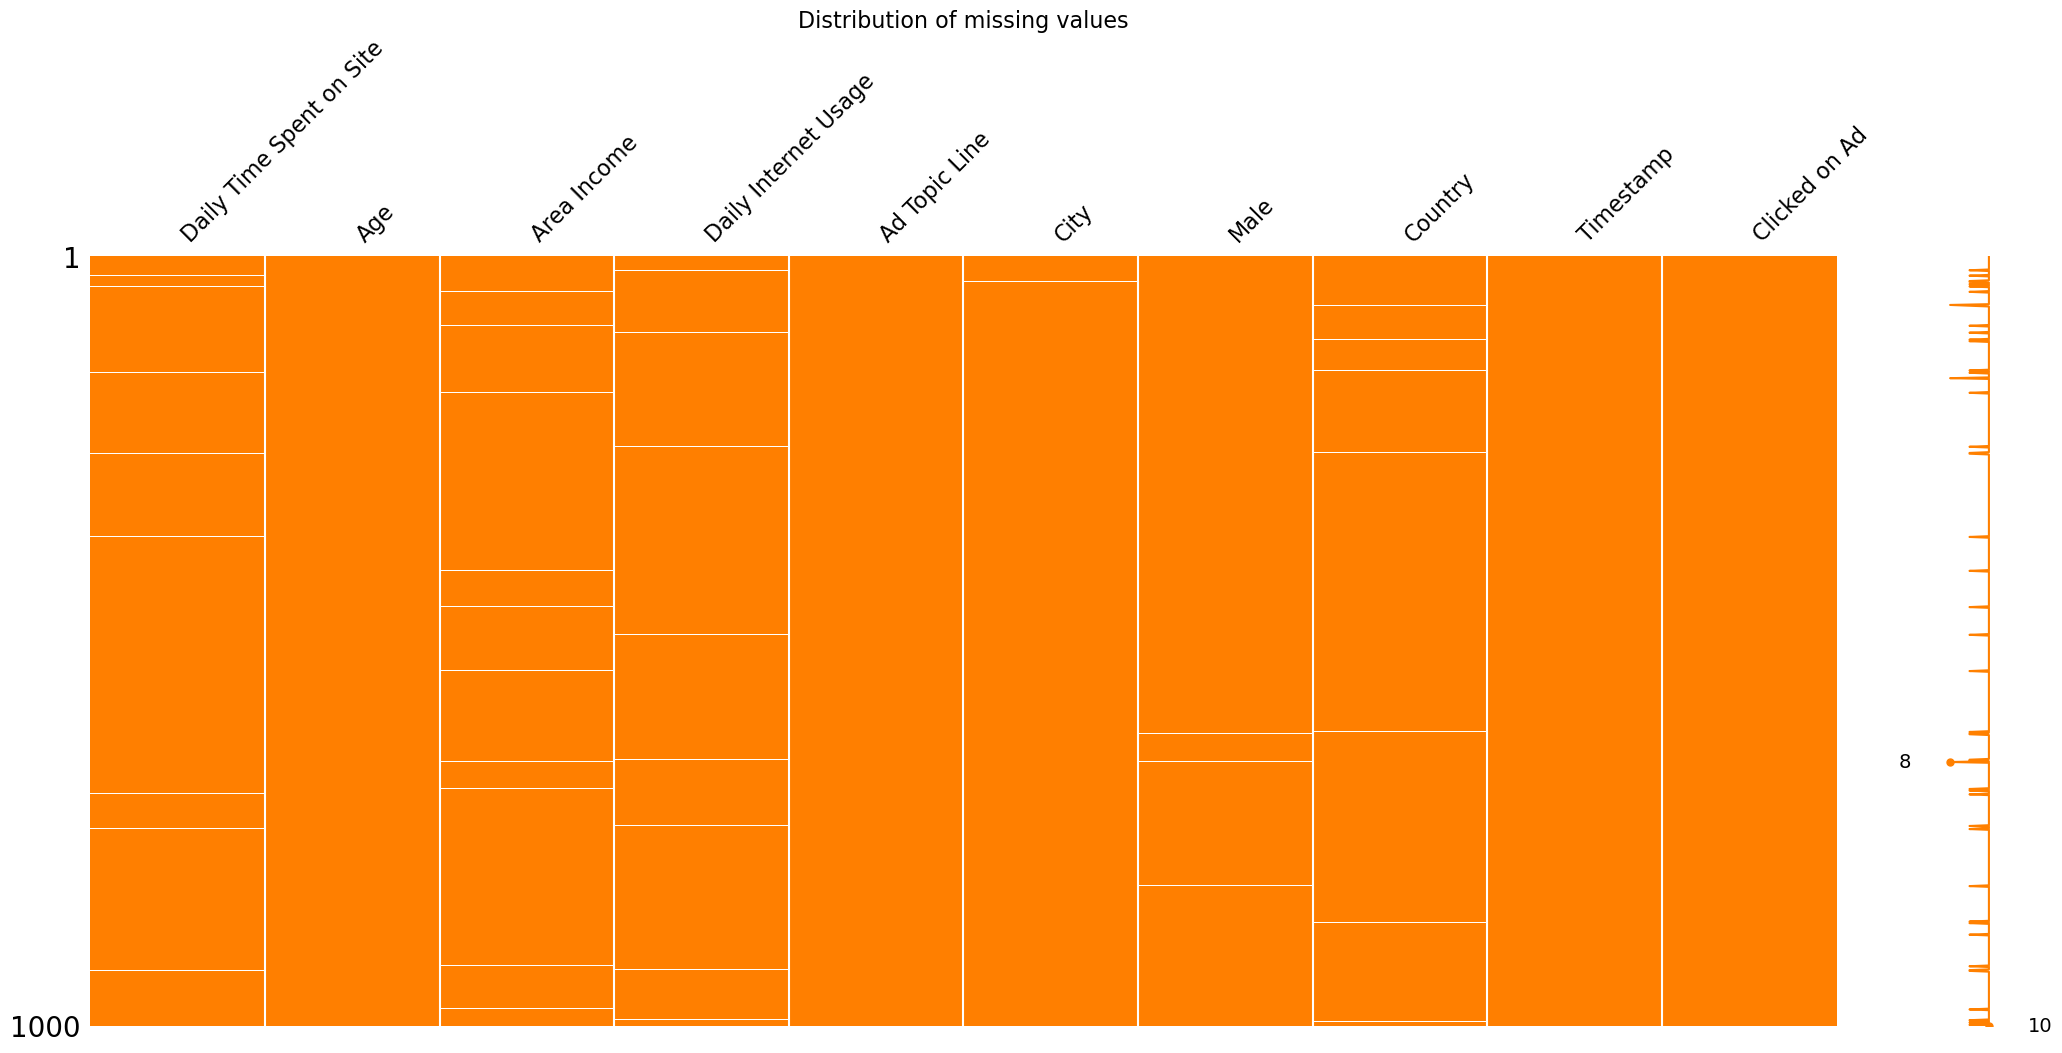

In [193]:
# Use missingno to visualize the distribution of the missing values 
msno.matrix(df, color=(1, 0.5, 0))
plt.title("Distribution of missing values", fontsize=16)
plt.show()

**Finding**: There are some null values within the dataset on multiple columns but they are very small compared to the whole data points that we can impute with median or mean. There are also duplicated rows within the dataset in total of 215 rows, so we have to delete these duplications later on in the data cleaning part.

In [194]:
# Gain an overview of the descriptive statistics of the dataset
df.describe(include=["float64", "int64"])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [195]:
# Detect outliers using IQR range 
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Check for outliers in the numerical features
for column in num_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"There are outliers in the {column} {len(outliers)} rows")
    else:
        print(f"There are no outliers in the {column} column")

There are no outliers in the Daily Time Spent on Site column
There are no outliers in the Age column
There are outliers in the Area Income 8 rows
There are no outliers in the Daily Internet Usage column
There are no outliers in the Male column
There are no outliers in the Clicked on Ad column


In [196]:
# Check the outlier range from the lower and upper bounds 
outliers, lower_bound, upper_bound = detect_outliers_iqr(df, "Area Income")
print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower bound is: 19149.9
The upper bound is: 93277.01999999999


In [197]:
# Define the columns to visualize the box plots
columns = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

# Create a subplot grid with 2 rows and 2 columns
fig = go.Figure()
fig = make_subplots(rows=2, cols=2, subplot_titles=columns)
for i, column in enumerate(columns):
    row = i // 2 + 1  
    col = i % 2 + 1   
    fig.add_trace(px.box(df, y=column).data[0], row=row, col=col)
fig.update_layout(title_text="Boxplots of Numerical Features", height=800)
fig.show()

**Finding**: Based on the descriptive table above and the outlier detection function, we have found that:

1. **Outlier detection**: Using the IQR method (1.5×IQR bounds), we identified 8 outlier records in the `Area Income` column . No significant outliers were found in other numerical columns.

2. **Outlier characteristics**: Outliers fell between around 14000 (Minimum values) and 19000 (Lower Bound), which can be retained for now because of marginal deviation from the lower bound.

In [198]:
# Check with the categorical features 
df.describe(include=["object"])

,Ad Topic Line,City,Country,Timestamp
count,1000,999,991,1000
unique,1000,968,237,997
top,Cloned 5thgeneration orchestration,Lisamouth,France,5/26/2016 15:40
freq,1,3,9,2


In [199]:
# Check the distribution of the target variable 
y_counts = df["Clicked on Ad"].value_counts().reset_index()
fig = px.bar(y_counts, x="Clicked on Ad", y="count", title="Distribution of Clicked on Ad")
fig.update_layout(xaxis_title="Clicked on Ad", yaxis_title="Count", xaxis_tickvals=[0, 1], 
                  xaxis_ticktext=["Not Clicked", "Clicked"], yaxis_range=[0, y_counts["count"].max() * 1.2])
fig.update_traces(marker_color=["#636EFA", "#EF553B"], text=y_counts["count"], textposition="outside")
fig.show()

In [200]:
# Map binary gender column to labels
df["Gender"] = df["Male"].map({1.0: "Male", 0.0:"Female"})
df = df.drop("Male", axis=1)

In [201]:
# Check the distribution of gender
gender_counts = df["Gender"].value_counts().reset_index()
fig = px.bar(gender_counts, x="Gender", y="count", title="Distribution of Gender")
fig.update_layout(yaxis_range=[0, gender_counts["count"].max() * 1.2])
fig.update_traces(marker_color=["#636EFA", "#EF553B"], text=gender_counts["count"], textposition="outside")
fig.show()

In [202]:
# Check the top 10 most common country
df["Country"].value_counts().head(10)

Country
France            9
Czech Republic    9
Afghanistan       8
Turkey            8
Micronesia        8
Liberia           8
Senegal           8
Peru              8
South Africa      8
Greece            8
Name: count, dtype: int64

**Finding from Data Understanding**: 

1. **Daily Time Spent on Site**: We see users spend between 32 minutes to 91 minutes on the site with an average value of 62 minutes, which is a large amount of time that the users per day on the site. This shows that it is a very popular site among the users, and we would want to see if there is any correlation with ad click behavior.

2. **Age**: The users age range from 19 to 60 with a mean of 36 years old, which indicates that the target users are mostly working adults. This feature can also affect the likelihood of clicking an ad or not, depending on their age ranges.

3. **Area Income**: The minimum area income is around 14K and the maximum is around 80K with an average area income of 54K, which indicates that the users are from different social classes that can also affect the ad click variable as well because users from high area income might have higher chance to click the ad based on initial assumption but we will explore that deeper. 

4. **Daily Internet Usage**: The daily internet usage ranges from 105 minutes to 267 minutes with an average value of 180 minutes, and if we compare this to the daily spent on site, we can see that users spend a large amount of time on the site because the different between these columns is not large. 

4. **Gender**: The number of female users is sligtly higher than males about 40, which is well-balanced. 

5. **Other Categorical Features**: *Ad Topic Line*, *City*, and *Country* have a lot of unique values which indicates that users come from different places and saw different ads. This can make it harder for the model to learn patterns from these features as the number of unqiue values are high which can introduce noise and too many inputs for training, so we might consider dropping these columns from including in the trainint process.

6. **Clicked on Ad**: The target variable is well-balanced, indicating that there is no need to apply resampling techniques to address class imbalance.

#### **Data Cleaning**

In [203]:
# Drop duplicated rows
df = df.drop_duplicates()
print("Number of duplicated rows after dropping: ", df.duplicated().sum())

Number of duplicated rows after dropping:  0


In [204]:
# Handle the missing values for Daily Time Spent on Site, Area Income, Daily Internet Usage, Gender
num_fill_median = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage"]
cat_fill_mode = ["Gender"]

for column in num_fill_median:
    df[column] = df[column].fillna(df[column].median())

for column in cat_fill_mode:
    df[column] = df[column].fillna(df[column].mode()[0])

# Check the missing values after filling
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        1
Country                     9
Timestamp                   0
Clicked on Ad               0
Gender                      0
dtype: int64

**Note**: We do not handle missing values for City and Country columns as we are going to drop it later because we are not using it for model training.

In [205]:
# Change the Timestamp column data types
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
print(f"Unique year: {df['Timestamp'].dt.year.unique()}")
print(f"Unique month: {sorted(df['Timestamp'].dt.month.unique().tolist())}")
print(f"Unique day: {sorted(df['Timestamp'].dt.day.unique().tolist())}")
print(f"Unique hour: {sorted(df['Timestamp'].dt.hour.unique().tolist())}")

Unique year: [2016]
Unique month: [1, 2, 3, 4, 5, 6, 7]
Unique day: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Unique hour: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


**Finding**:  The dataset contains data from only one year 2016. It includes records from seven months, specifically from January to July, and the dataset includes data for all days and hours. The timestamp can be a valuable feature for identifying patterns in ad-click behavior. For example, users may be more likely to click on ads during certain times of the day, such as lunchtime or evenings after work.

In [206]:
# Extract month, day, day of the week, hour
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Day of Week"] = df["Timestamp"].dt.dayofweek
df["Hour"] = df["Timestamp"].dt.hour

# Drop the timestamp column 
df = df.drop("Timestamp", axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Clicked on Ad,Gender,Month,Day,Day of Week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,0,Female,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,0,Male,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,0,Female,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,0,Male,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,0,Female,6,3,4,3


In [207]:
# Drop the columns that are not useful for the model
dropped_columns = ["Ad Topic Line", "City", "Country"]
df = df.drop(dropped_columns, axis=1)
print(f"Columns after dropping: {df.columns}")

Columns after dropping: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'Gender', 'Month', 'Day',
       'Day of Week', 'Hour'],
      dtype='object')


#### **Exploratory Data Analysis**

In [210]:
# Check the distribution of age
fig = px.histogram(df, x="Age", nbins=30, title="Distribution of Age")
fig.update_layout(xaxis_title="Age", yaxis_title="Count")
fig.show()

In [170]:
# How does age affect on clicked on ad
fig = px.box(df, x="Clicked on Ad", y="Age", color="Clicked on Ad", 
             title="Age Distribution by Clicked on Ad", points="all")
fig.update_layout(xaxis_tickvals=[0, 1], xaxis_ticktext=["Not Clicked", "Clicked"], 
                  legend_title="Ad Click Status")

# Change legend label to text
fig.update_traces(name="Not Clicked", selector=dict(name="0"))
fig.update_traces(name="Clicked", selector=dict(name="1"))
fig.show()

**Finding**: The box plot reveals that most users who did not click on the ad are aged between 19 and 49, with very few non-clickers above age 49. In contrast, users who clicked on the ad range from 19 to 61. This suggests that older users with age around 50 years plus are likely to click on the ad.

In [171]:
# How does gender affect the clicked on ad
gender_clicks = df.groupby("Gender")["Clicked on Ad"].value_counts().reset_index()
fig = px.bar(gender_clicks, x="Clicked on Ad", y="count", color="Gender", text="count",
             barmode="group", title="Gender Distribution by Clicked on Ad")
fig.update_layout(yaxis_title="Count", xaxis_tickvals=[0, 1], 
                  xaxis_ticktext=["Not Clicked", "Clicked"],
                  yaxis_range=(0, gender_clicks["count"].max() * 1.2))
fig.update_traces(textposition="outside")
fig.show()

**Finding**:  Based on the bar chart showing gender distribution for ad clicks, there is little difference between Male and Female users who did not click on the ad. However, among those who did click, around 40 more Female users engaged with the ad compared to Males. This suggests that Female users may have a slightly higher tendency to click on ads than Male users.

In [212]:
# Check the distribution of area income
fig = px.histogram(df, x="Area Income", nbins=40, title="Distribution of Age")
fig.update_layout(xaxis_title="Area Income", yaxis_title="Count")
fig.show()

In [172]:
# How does income affect clicked on ad
fig = px.box(df, x="Clicked on Ad", y="Area Income", color="Clicked on Ad", 
             title="Area Income Distribution by Clicked on Ad", points="all")
fig.update_layout(xaxis_tickvals=[0, 1], xaxis_ticktext=["Not Clicked", "Clicked"])

# Change legend label to text
fig.update_traces(name="Not Clicked", selector=dict(name="0"))
fig.update_traces(name="Clicked", selector=dict(name="1"))
fig.show()

**Finding**: The box plot comparing Area Income for users who clicked and did not click on the ad shows a big difference between the two groups. We can see that those users who did not click the ad are located in area with average income between 33K to 80K. In contrast to those users who clicked the ad with area income range from as low as 14K to 79K, which indicates that for those users who are located in area with average income below 33K, they tend to click the ad.

In [214]:
# How does age and area income affect clicked on ad
df['Clicked Label'] = df['Clicked on Ad'].map({0: 'Not Clicked', 1: 'Clicked'})
fig = px.scatter(df, x="Area Income", y="Age", color="Clicked Label",
                 title="Age vs Area Income by Clicked on Ad",
                 color_discrete_sequence=["blue", "red"])

fig.show()

**Finding**: Based on the scatter plot, we observe that users under 50 years old who are located in areas with an average income above $33K tend to not click on the ad. On the other hand, when the area income is below $46K, a clear pattern emerges where most users, regardless of age, tend to click on the ad.

In [217]:
# Check the distribution of daily time spent on site
fig = px.histogram(df, x="Daily Time Spent on Site", nbins=30, title="Distribution of Daily Time Spent on Site")
fig.show()

In [219]:
# How does daily spent on site affect clicked on ad
fig = px.box(df, x="Clicked on Ad", y="Daily Time Spent on Site", color="Clicked on Ad", 
             title="Daily Time Spent on Site Distribution by Clicked on Ad", points="all")
fig.update_layout(xaxis_tickvals=[0, 1], xaxis_ticktext=["Not Clicked", "Clicked"])

# Change legend label to text
fig.update_traces(name="Not Clicked", selector=dict(name="0"))
fig.update_traces(name="Clicked", selector=dict(name="1"))
fig.show()

**Finding**: We can see that most users who clicked on the ad tend to spend less time on the site daily compared to those who did not click on the ad. 

In [223]:
# Check the distribution of daily internet usage
fig = px.histogram(df, x="Daily Internet Usage", nbins=30, title="Distribution of Daily Internet Usage")
fig.show()

In [224]:
# How does daily spent on site affect clicked on ad
fig = px.box(df, x="Clicked on Ad", y="Daily Internet Usage", color="Clicked on Ad", 
             title="Daily Internet Usage Distribution by Clicked on Ad", points="all")
fig.update_layout(xaxis_tickvals=[0, 1], xaxis_ticktext=["Not Clicked", "Clicked"])

# Change legend label to text
fig.update_traces(name="Not Clicked", selector=dict(name="0"))
fig.update_traces(name="Clicked", selector=dict(name="1"))
fig.show()

In [229]:
# Check the correlation between daily time spent on site and daily internet usage
fig = px.scatter(df, x="Daily Time Spent on Site", y="Daily Internet Usage", color="Clicked Label",
                 title="Daily Time Spent on Site vs Daily Internet Usage by Clicked on Ad",
                 color_discrete_sequence=["blue", "red"])

fig.show()

In [227]:
df[(df["Daily Internet Usage"] < 180) & (df["Daily Time Spent on Site"] < 65)]["Clicked on Ad"].value_counts()

Clicked on Ad
1    352
0      3
Name: count, dtype: int64

In [228]:
df[(df["Daily Internet Usage"] > 180) & (df["Daily Time Spent on Site"] > 65)]["Clicked on Ad"].value_counts()

Clicked on Ad
0    429
1     14
Name: count, dtype: int64

**Finding**: The scatterplot between daily time spent on site and daily internet usage reveals a trend in ad engagement. Users who spend more than 65 minutes on the site and have high overall internet usage (over 180 minutes) tend to not click on the ad, possibly indicating ad fatigue or that these users are more selective or desensitized to ads. In contrast, users with moderate site engagement (below 65 minutes) and lower internet usage (below 180 minutes) are more likely to click on ads, suggesting that less frequent users may be more responsive to targeted advertisements.

In [247]:
# Are there specific times of day when ads perform better?
hour_clicks = df.groupby("Hour")["Clicked on Ad"].value_counts().reset_index()
hour_clicks["Clicked on Ad"] = hour_clicks["Clicked on Ad"].map({0: "Not Clicked", 1: "Clicked"})

fig = px.bar(hour_clicks, x="Hour", y="count", color="Clicked on Ad", barmode="group",
            color_discrete_map={"Clicked": "#d62728", "Not Clicked": "#0000FF"}, 
            title="Ad Clicks by Hour of Day" )
fig.update_layout(xaxis_title="Hour of Day", yaxis_title="Count",
                  legend_title="Ad Engagement", yaxis_range=[0, hour_clicks["count"].max() * 1.2])
fig.show()

**Finding**: Based on the chart, there is no significant pattern in ad clicks across different hours of the day. The number of users who clicked or did not click the ad remains relatively stable throughout the day, suggesting that time of day may not be a strong factor influencing ad engagement in this dataset.

In [251]:
# Are there specific month when ads perform better?
hour_clicks = df.groupby("Month")["Clicked on Ad"].value_counts().reset_index()
hour_clicks["Clicked on Ad"] = hour_clicks["Clicked on Ad"].map({0: "Not Clicked", 1: "Clicked"})

fig = px.bar(hour_clicks, x="Month", y="count", color="Clicked on Ad", barmode="group",
            color_discrete_map={"Clicked": "#d62728", "Not Clicked": "#0000FF"}, 
            title="Ad Clicks by Month " )
fig.update_layout(xaxis_title="Month", yaxis_title="Count",
                  legend_title="Ad Engagement", yaxis_range=[0, hour_clicks["count"].max() * 1.2])
fig.show()

In [252]:
# Are there specific month when ads perform better?
hour_clicks = df.groupby("Day of Week")["Clicked on Ad"].value_counts().reset_index()
hour_clicks["Clicked on Ad"] = hour_clicks["Clicked on Ad"].map({0: "Not Clicked", 1: "Clicked"})

fig = px.bar(hour_clicks, x="Day of Week", y="count", color="Clicked on Ad", barmode="group",
            color_discrete_map={"Clicked": "#d62728", "Not Clicked": "#0000FF"}, 
            title="Ad Clicks by Day of Week " )
fig.update_layout(xaxis_title="Day of Week", yaxis_title="Count",
                  legend_title="Ad Engagement", yaxis_range=[0, hour_clicks["count"].max() * 1.2])
fig.show()

**EDA Conclusion**: Based on our exploratory analysis, we can draw the following insights:

- **Age and Ad Engagement**: 
    - Users who clicked on ads ranged broadly in age (19 to 61), while those who did not click were mainly aged 19 to 49.
    - This suggests that older users (50+) are more likely to engage with ads, possibly due to more purchase intent or different browsing behaviors.

- **Gender**:
    - There is no strong correlation between gender and ad clicks.
    - Therefore, gender does not appear to be a significant predictor of ad engagement in this dataset.

- **Area Income**:
    - Users in areas with lower average incomes (< $33K) are more likely to click on ads.
    - Those in higher income areas ($33K to $80K), particularly under age 50, tend not to engage with ads.
    - This implies that area income level, combined with age, can influence ad responsiveness.

- **Daily Time Spent on Site**: 
    - Users who spend more time on the site are less likely to click on ads.
    - Conversely, those who spend less time tend to engage more, suggesting that quick, casual users may be more susceptible to ads.

- **Internet Usage and Site Time**:
    - Users with high internet usage (>180 mins) and high site time (>65 mins) are less likely to click, indicating ad fatigue or selective behavior.
    - Moderate users (site time < 65 mins, internet usage < 180 mins) are more responsive, offering a prime opportunity for targeting.

- **Hourly Trends**:
    - Ad engagement is evenly distributed throughout the day with no significant hourly variation, suggesting no need for time-based ad optimization in this context.

#### **Model Development**

In [253]:
# Feature selection
selected_features = ["Area Income", "Age", "Daily Time Spent on Site", "Daily Internet Usage", "Clicked on Ad"]
selected_df = df[selected_features]

# Split the data into features and target variable
X = selected_df.drop("Clicked on Ad", axis=1)
y = selected_df["Clicked on Ad"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check the scaled data
X_train_scaled[:5], X_test_scaled[:5]

(array([[-0.66798368, -1.59171433,  0.68619206,  0.64875708],
        [ 1.1232608 , -0.45872077,  0.85925995,  0.60745522],
        [ 0.90677621,  0.22107537,  0.5263885 ,  1.43831108],
        [ 0.26369364, -0.91191819,  0.9167387 ,  1.03814189],
        [-0.44052143,  1.12747022, -1.00722036, -1.51316612]]),
 array([[-0.02106352, -0.79861884, -0.11977371, -1.40165109],
        [-1.01812432,  1.80726636,  0.38363908, -1.35277721],
        [ 0.50277316,  0.22107537, -1.35967247, -1.06228742],
        [ 0.92109693,  1.46736829, -1.46010238,  0.01293781],
        [ 0.8386269 , -0.79861884,  0.85420687,  0.60814358]]))

In [255]:
# Model Training on Logistic Regression as baseline model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [258]:
# Make prediction on testing set and check accuracy
accuracy = log_reg_model.score(X_test_scaled, y_test)
print(f"Accuracy of Logistic Regression model: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression model: 95.00%


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        89
           1       0.97      0.94      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



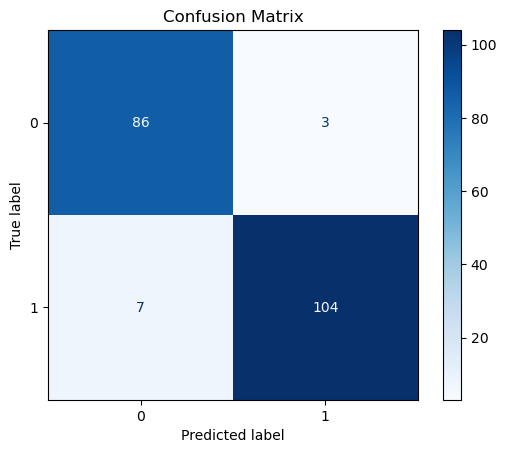

In [280]:
# Get the confusion matrix
y_pred = log_reg_model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()